<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/ass5/hpdp/ZProMax/feature_engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 5: Automated Feature Engineering tools - FeatureTools <a href="https://colab.research.google.com/drive/1kUYIUslw4_YkcfG_7GB4brzjqaGW0TnS?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Group Members
**Group Name: ZProMax**

| Name                                     | Matrix Number
| :---------------------------------------- | :-------------:
| NG SUANG JOO | A21EC0102  
| LING WAN YIN | A21EC0047
| FONG KHAH KHEH | A21EC0026

#**Step 1. Dataset Selection**


##**About Data**

The New York Bus Ride Service dataset is from Kaggle Website. The dataset [```search.csv```](https://www.kaggle.com/datasets/asimzahid/new-york-bus-rides-service/data)has  over 5,000,000 of records, 13 columns, around 1.0GB of data. It records user interactions with a fixed-route ridesharing platform within New York City. The platform is designed to meet the diverse needs of customers by offering them a range of options based on factors such as travel time, distance and price.


###**Goal**
Its goal is to enhance the overall user experience and increase conversion rates through a data-driven approach.

##**Dataset Descriptions**
* **Search**

This file represents all the searches made on the platform for booking

| Attribute                   | Description                                                                                                      |
|:----------------------------|:-----------------------------------------------------------------------------------------------------------------|
| `session_id`                | Session of the search                                                                                 |
| `search_id`                 | Unique search in the session                                                     |
| `user_id`                   | ID of the user                                                                           |
| `search_city`               | City where the search happened                                                                            |
| `search_time`               | Local time of the search                                                        |
| `num_of_results`            | Number of results returned for the search.                                                                      |
| `is_result`                 | Whether a search gave a result or not                                   |
| `median_pickup_walk_time`   | Estimated time for the user to walk from the desired pickup to the bus station.                                 |
| `median_dropoff_walk_time`  | Estimated time for the user to walk from the bus station to the desired destination.                             |
| `median_bus_travel_time`    | Estimated bus travel time.                                                                                      |
| `high_demand_val`           | Indicates very few seats left or that the bus is full             |
| `user_device_os`            | Platform of the mobile device                                                |
| `user_device_app_version`   | Version number                                                                               |


#**Step 2: Loading the Dataset**

##**Downloading the Dataset**


The dataset can be retrieved from Kaggle : [New York Bus Ride Service dataset](https://www.kaggle.com/datasets/asimzahid/new-york-bus-rides-service/data)
<br><br>

##**Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import dask
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
warnings.filterwarnings('ignore')

##**Importing drive into google colab**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Sampling**
Since this is a large dataset with over million pieces of data, it is very time consuming. To avoid converting the entire dataset to datetime all at once, we can process it in sampling.

Random sample of 10% of dataset

In [3]:
file = '/content/drive/MyDrive/Colab Notebooks/searches.csv'
n = sum(1 for line in open(file))-1
s = n//10
skip = sorted(random.sample(range(1, n+1), n-s))

##**Load the selected dataset into dataframe**

In [4]:
df = pd.read_csv(file, skiprows=skip)
df.head()

,session_id,search_id,user_id,search_city,search_time,num_of_results,is_result,median_pickup_walk_time,median_dropoff_walk_time,median_bus_travel_time,high_demand_val,user_device_os,user_device_app_version
0,9f0837bf-b77c-41dd-a860-25f62f0c1a6e,1beb144b-8579-464d-8a4b-10577bc9c141,5ac5df04ec46ee0010a8cec3,New York,2020-03-16 06:49:58.814 UTC,10,True,480.0,2220.0,2334.0,0,ios,3390.0
1,6a4ad376-379b-4b1c-8292-8993e955471b,66ec3aea-89da-4fa4-b9c9-39e9726fdbdf,5be6e1dca53db40018ac0165,New York,2020-03-22 13:01:57.292 UTC,10,True,6840.0,1320.0,5053.0,0,android,292.0
2,1c105134-2927-4f81-981f-599945ce0320,42957ae9-9b23-443c-bb25-61209e701ef8,5c0402f999fa270019646155,New York,2019-12-12 13:36:23.331 UTC,27,True,900.0,1200.0,1354.5,0,android,286.0
3,b51ed2cb-ef7d-4d59-a3a1-0abbec416b70,105c5f07-5bfa-46ce-8128-05664439a365,5be5ef1d9f9ac40019655064,New York,2019-10-27 13:01:10.589 UTC,40,True,660.0,1320.0,3168.5,0,android,278.0
4,b662abc9-e7df-4efe-9d22-66a600816ab7,e106993c-3487-496a-9a6f-0ea4210fe408,5df48e0015f009001aca7c8c,New York,2019-12-15 07:16:43.328 UTC,40,True,5880.0,1260.0,2615.0,0,ios,3301.0


#**Step 3: Data Preparation & Cleaning**

Perform data cleansing before moving on to data analysis, such as determining whether any missing values exist and adding a specific column to make the analysis process easier.

**number of elements(cells) in the dataframe**

In [5]:
df.size

7409129

**rows and columns**

In [6]:
df.shape

(569933, 13)

**Column and Data Type**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569933 entries, 0 to 569932
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   session_id                569933 non-null  object 
 1   search_id                 569933 non-null  object 
 2   user_id                   569933 non-null  object 
 3   search_city               569933 non-null  object 
 4   search_time               569933 non-null  object 
 5   num_of_results            569933 non-null  int64  
 6   is_result                 569933 non-null  bool   
 7   median_pickup_walk_time   437248 non-null  float64
 8   median_dropoff_walk_time  437248 non-null  float64
 9   median_bus_travel_time    446548 non-null  float64
 10  high_demand_val           569933 non-null  int64  
 11  user_device_os            569640 non-null  object 
 12  user_device_app_version   569640 non-null  float64
dtypes: bool(1), float64(4), int64(2), object(6)


**Handle Missing Values**

In [8]:
df.isnull().sum()

session_id                       0
search_id                        0
user_id                          0
search_city                      0
search_time                      0
num_of_results                   0
is_result                        0
median_pickup_walk_time     132685
median_dropoff_walk_time    132685
median_bus_travel_time      123385
high_demand_val                  0
user_device_os                 293
user_device_app_version        293
dtype: int64

**Delete rows with the missing values**

It is observed that there are missing values in the columns `median_pickup_walk_time`, `median_dropoff_walk_time` & `median_bus_travel_time` and this could possibly be due to the `is_result` being **'False'**. `is_result` being **'False'** means that the search for bus rides is unsuccessful. Thus, in this case, impute missing values with the value of zero.

In [9]:
df.loc[df['is_result'] == False, 'median_pickup_walk_time'] = 0
df.loc[df['is_result'] == False, 'median_dropoff_walk_time'] = 0
df.loc[df['is_result'] == False, 'median_bus_travel_time'] = 0

Whereas, handle the rows of `median_pickup_walk_time`, `median_dropoff_walk_time` & `median_bus_travel_time` having **'True'** (`is_result`) by imputing with the median value.

In [10]:
# Impute missing values with the median
median_values = df['median_pickup_walk_time'].median()
df['median_pickup_walk_time'].fillna(median_values, inplace=True)

# Repeat for other columns
median_values = df['median_dropoff_walk_time'].median()
df['median_dropoff_walk_time'].fillna(median_values, inplace=True)

median_values = df['median_bus_travel_time'].median()
df['median_bus_travel_time'].fillna(median_values, inplace=True)

Investigation of the remaining records with
 **null** value in the column of `user_device_os` is shown below.                 

In [11]:
df[df['user_device_os'].isnull()]

,session_id,search_id,user_id,search_city,search_time,num_of_results,is_result,median_pickup_walk_time,median_dropoff_walk_time,median_bus_travel_time,high_demand_val,user_device_os,user_device_app_version
178,ae7537e2-30b8-42da-8014-6283eef908ac,1eea6365-4721-4144-b30a-4025665bf9be,5b9f7f19ca08ca000f74f069,New York,2019-12-28 19:54:39.431 UTC,40,True,9600.0,180.0,2766.0,0,NaN,NaN
2089,625cfa7a-85e2-4963-a033-af2b6df45245,f83e3760-df62-4fbf-8bfb-74660cac24f7,5b7a31b1330e22001213e2ad,New York,2020-01-02 05:05:08.961 UTC,10,True,2160.0,600.0,4869.5,0,NaN,NaN
6947,6725b87b-b923-48c1-a556-a195a3c79ab3,cf793c63-7a2e-416c-80f4-4ac50e1a6ef9,5c2c90991e5ba60019869b65,New York,2019-11-30 09:59:28.44 UTC,40,True,10200.0,480.0,11476.0,0,NaN,NaN
13948,7411b592-18e3-4856-bb89-398a17b52767,4cb26434-263c-4d71-be3c-4c812dc320d8,5a97e310505d4f000f6d7488,New York,2019-11-28 05:07:32.609 UTC,10,True,2160.0,540.0,1177.5,0,NaN,NaN
15849,c1f12795-48c0-4da7-a5d4-526660eb8b43,61a42b82-3bf9-4670-acce-2318a527d137,5d8a36556c0bfc0019378a24,New York,2020-02-19 21:39:19.854 UTC,10,True,180.0,720.0,1440.0,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
563796,8999f3b0-e5ec-4346-abce-9ddc5610cb2e,39a750a4-5b2c-4290-90bf-3c8b66efd082,5bfc600167c4cc0019e81164,New York,2019-11-25 14:06:08.314 UTC,10,True,720.0,180.0,5141.0,4,NaN,NaN
567606,8771a2b5-fb2a-4ae6-b9b0-85f824af8e89,6e731840-7623-4692-ae95-64ccca97b358,5c2c90991e5ba60019869b65,New York,2019-12-03 21:07:37.627 UTC,0,False,0.0,0.0,0.0,0,NaN,NaN
568667,5d8a0e20-6563-423d-aad6-6f3106c3c43f,6916ead5-9ee8-4715-be32-9a3cd5c63cd8,5b9aa7231286c3000fb094a5,New York,2019-10-17 06:57:35.952 UTC,0,False,0.0,0.0,0.0,0,NaN,NaN
568702,c7409337-f073-4efc-89c0-d64404a2e4ec,adf72b70-3d1a-4ffd-9395-e25eb74cca4a,5c2c90991e5ba60019869b65,New York,2019-11-23 11:09:42.793 UTC,0,False,0.0,0.0,0.0,0,NaN,NaN


It shows that the rows having **null** in `user_device_os` are associated with the column of `user_device_app_version`.

In [12]:
# Impute missing values with the most frequent value for user_device_os
most_frequent_os = df['user_device_os'].mode()[0]
df['user_device_os'].fillna(most_frequent_os, inplace=True)

# Impute missing values with the most frequent value for user_device_app_version
most_frequent_app_version = df['user_device_app_version'].mode()[0]
df['user_device_app_version'].fillna(most_frequent_app_version, inplace=True)

In [13]:
df.isnull().sum()

session_id                  0
search_id                   0
user_id                     0
search_city                 0
search_time                 0
num_of_results              0
is_result                   0
median_pickup_walk_time     0
median_dropoff_walk_time    0
median_bus_travel_time      0
high_demand_val             0
user_device_os              0
user_device_app_version     0
dtype: int64

In [14]:
df.shape

(569933, 13)

**Convert 'user_device_os' values to lowercase**

In [15]:
df['user_device_os'] = df['user_device_os'].str.lower()

**Dropping unnecessary columns**

The percentage of uniqueness of the column `search_city` is **0%**, which means every row has the same value. So, drop the column as it does not provide any distinguishing features.

In [16]:
df.drop(columns=['search_city'], inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569933 entries, 0 to 569932
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   session_id                569933 non-null  object 
 1   search_id                 569933 non-null  object 
 2   user_id                   569933 non-null  object 
 3   search_time               569933 non-null  object 
 4   num_of_results            569933 non-null  int64  
 5   is_result                 569933 non-null  bool   
 6   median_pickup_walk_time   569933 non-null  float64
 7   median_dropoff_walk_time  569933 non-null  float64
 8   median_bus_travel_time    569933 non-null  float64
 9   high_demand_val           569933 non-null  int64  
 10  user_device_os            569933 non-null  object 
 11  user_device_app_version   569933 non-null  float64
dtypes: bool(1), float64(4), int64(2), object(5)
memory usage: 48.4+ MB


**Describe Data**

In [18]:
df.describe()

,num_of_results,median_pickup_walk_time,median_dropoff_walk_time,median_bus_travel_time,high_demand_val,user_device_app_version
count,569933.000000,569933.000000,569933.000000,569933.000000,569933.000000,569933.000000
mean,14.879624,1124.581872,828.282096,2511.443553,0.674246,846.886624
std,14.739746,2298.489094,2018.066558,2106.647896,1.664509,1182.957888
min,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000
25%,7.000000,0.000000,60.000000,797.500000,0.000000,279.000000
50%,10.000000,420.000000,360.000000,2506.000000,0.000000,286.000000
75%,25.000000,960.000000,840.000000,3645.000000,0.000000,291.000000
max,100.000000,81600.000000,84960.000000,27024.000000,10.000000,3390.000000


#**Step 4: Exploratory Data Analysis (EDA)**

EDA involves employing statistical and graphical techniques to uncover insights, detect anomalies, and formulate hypotheses about the underlying data distribution.

## **The Distribution of User Device OS for the New York Bus Rides Service**

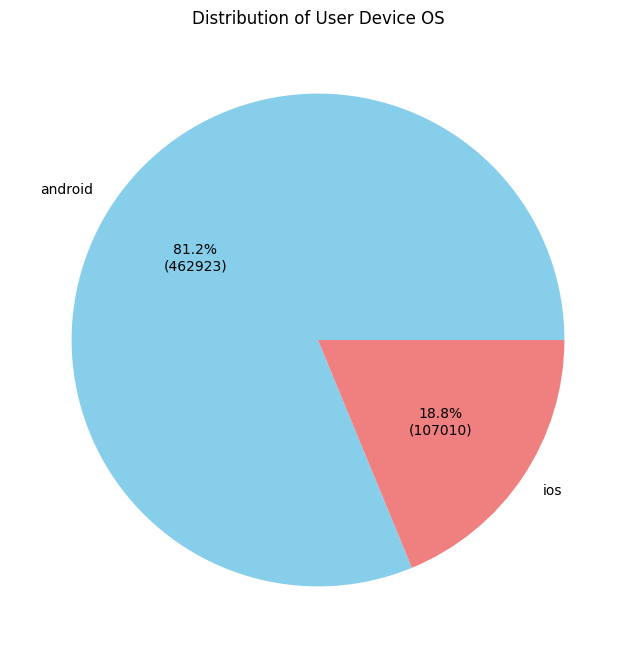

In [19]:
# Get value counts for 'user_device_os'
os_counts = df['user_device_os'].value_counts()

# Plot the distribution of 'user_device_os' in a pie chart with actual count values
plt.figure(figsize=(8, 8))
plt.pie(os_counts, labels=os_counts.index, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(os_counts) / 100),
        colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribution of User Device OS')
plt.show()

Based on the distribution of user device operating systems in the dataset:

Android is the dominant operating system, constituting approximately 81.1% of the user devices.
iOS, on the other hand, represents a smaller portion, accounting for around 18.9% of the user devices.

## **Distribution of is_result**

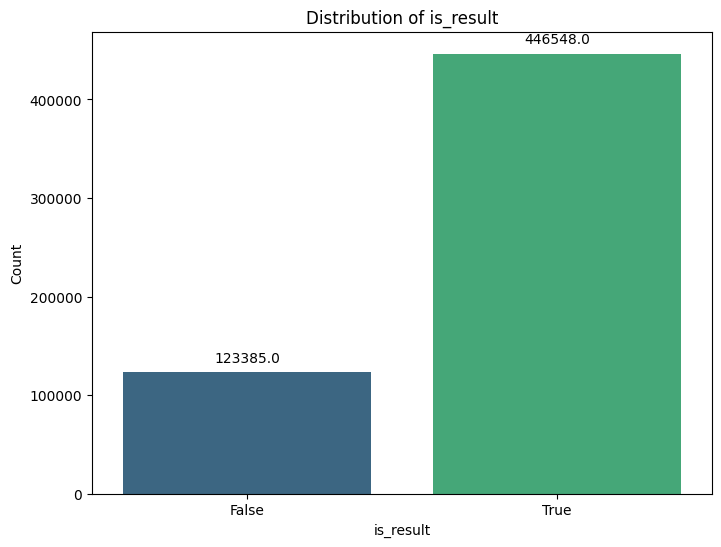

In [20]:
# Create a count plot to visualize the distribution of the 'is_result'
# Assuming 'df' is your DataFrame
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='is_result', data=df, palette='viridis')

# Annotate each bar with its count value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of is_result')
plt.xlabel('is_result')
plt.ylabel('Count')
plt.show()

In [21]:
is_result_counts = df['is_result'].value_counts().reset_index()
is_result_counts.columns = ['is_result', 'count']
is_result_counts

,is_result,count
0,True,446548
1,False,123385


*  is_result = True: There are 4,466,97 instances where the search gave a result.

*  is_result = False: There are 1,232,36 instances where the search did not give a result.

This suggests that a significant number of searches result in a positive outcome (is_result = True). In contrast, a smaller number of searches do not yield any results (is_result = False).

## **Distribution of Median Pickup Walk Time**

In [22]:
# Count of unique values in 'median_pickup_walk_time'
pickup_walk_time_counts = df['median_pickup_walk_time'].value_counts().reset_index()

# Rename columns for clarity
pickup_walk_time_counts.columns = ['median_pickup_walk_time', 'count']

# Display the count of each unique value
pickup_walk_time_counts


,median_pickup_walk_time,count
0,0.0,145115
1,420.0,27058
2,360.0,25102
3,300.0,20756
4,240.0,20751
...,...,...
767,14070.0,1
768,14430.0,1
769,29760.0,1
770,24420.0,1


There are counts of `median_pickup_walk_time` value of **0** because the process of replacing the **null** value with **0** for `is_result = 'False'` during data preprocessing as having `'False'` denotes the failure of the searching process for bus rides.

## **Correlation Matrix**

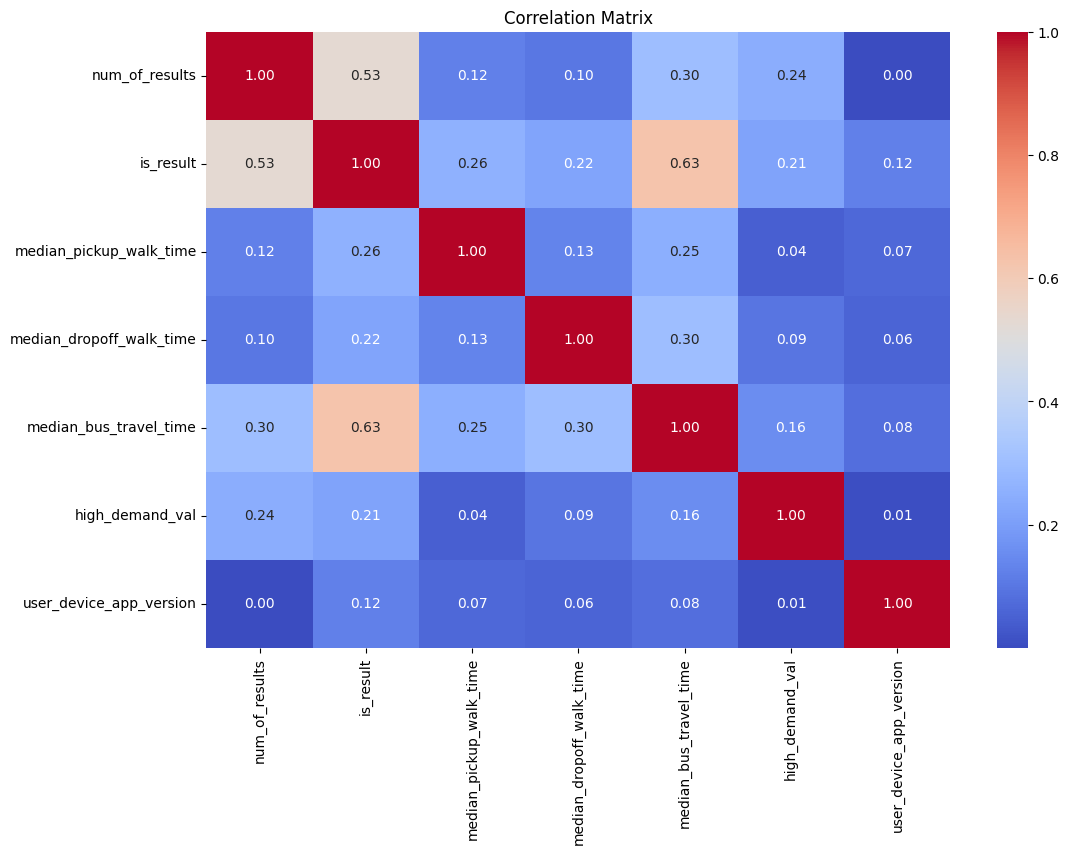

In [23]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

*   Values close to 1 indicate a strong positive correlation (as one variable
increases, the other tends to also increase).
*   Values close to -1 indicate a strong negative correlation (as one variable increases, the other tends to decrease).
*   Values close to 0 suggest a weak or no linear correlation.


## **Distribution of Android & IOS App Versions based on User Counts**

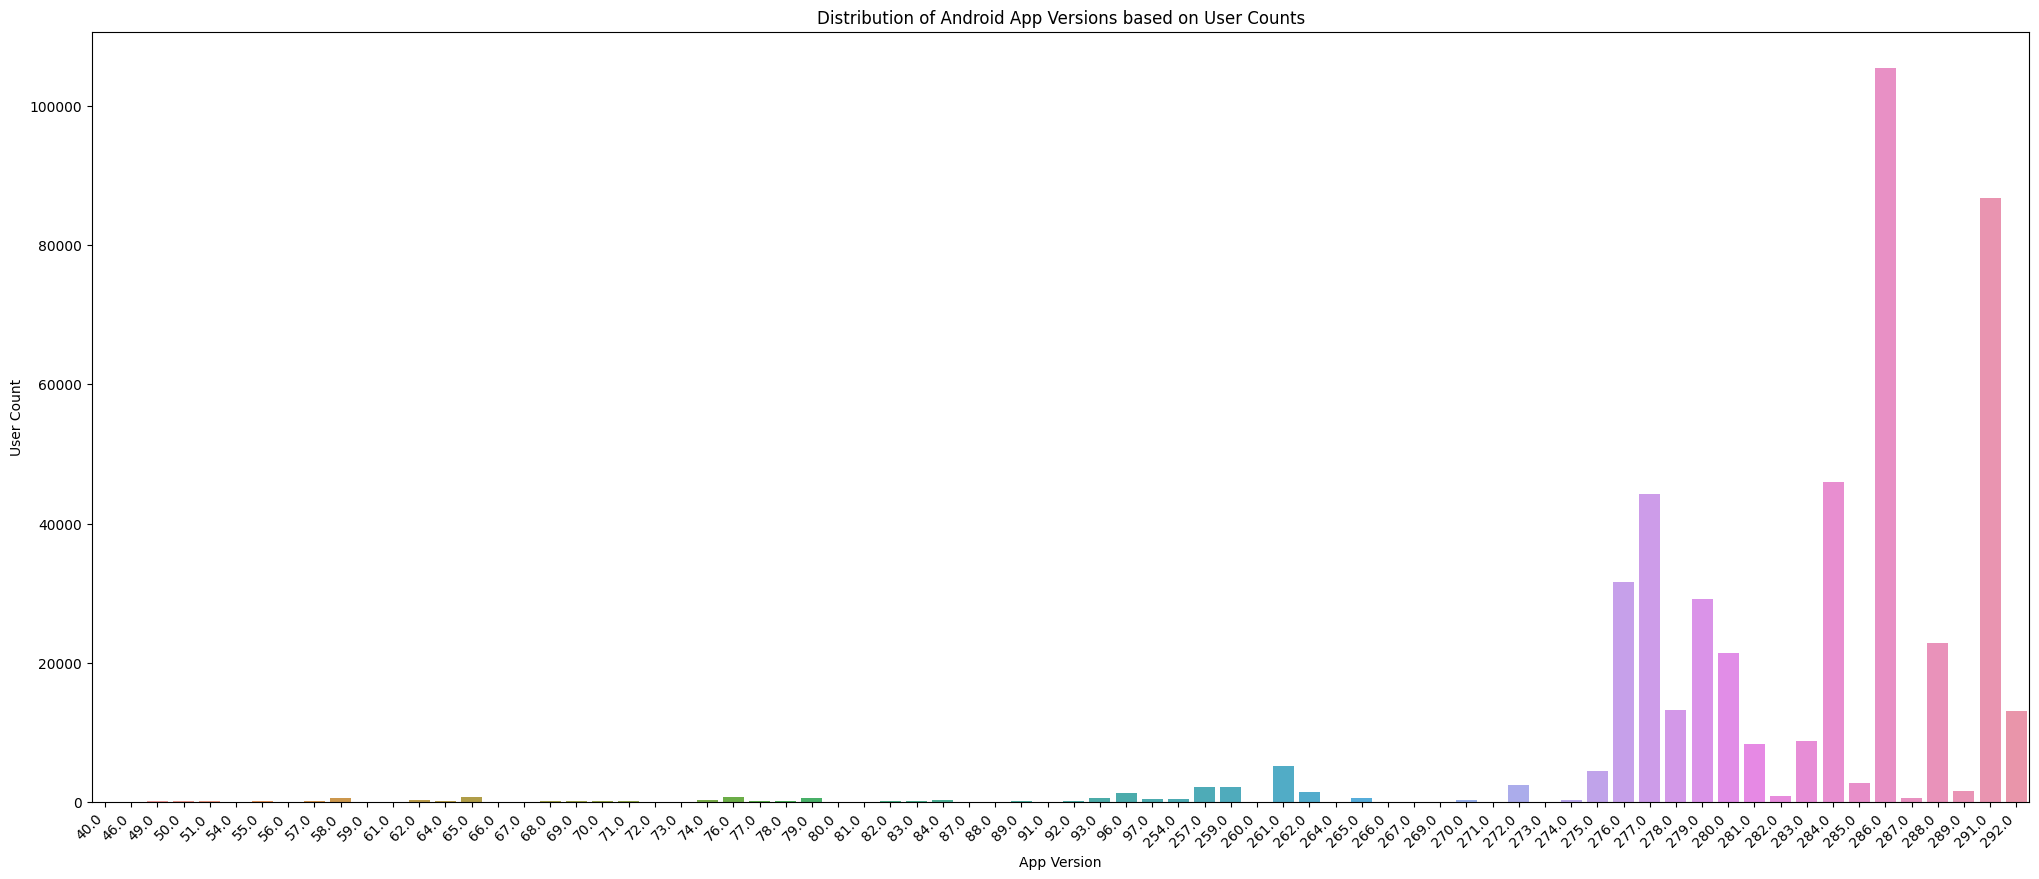

In [24]:
# Filter data for Android only
android_df = df[df['user_device_os'] == 'android']

# Group by app version and calculate user counts
version_category = android_df.groupby('user_device_app_version').size().reset_index(name='user_count')

# Plot the bar graph
plt.figure(figsize=(25, 10))
sns.barplot(x='user_device_app_version', y='user_count', data=version_category.sort_values('user_count', ascending=False))
plt.title('Distribution of Android App Versions based on User Counts')
plt.xlabel('App Version')
plt.ylabel('User Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

**Distribution of IOS App Versions based on User Counts**

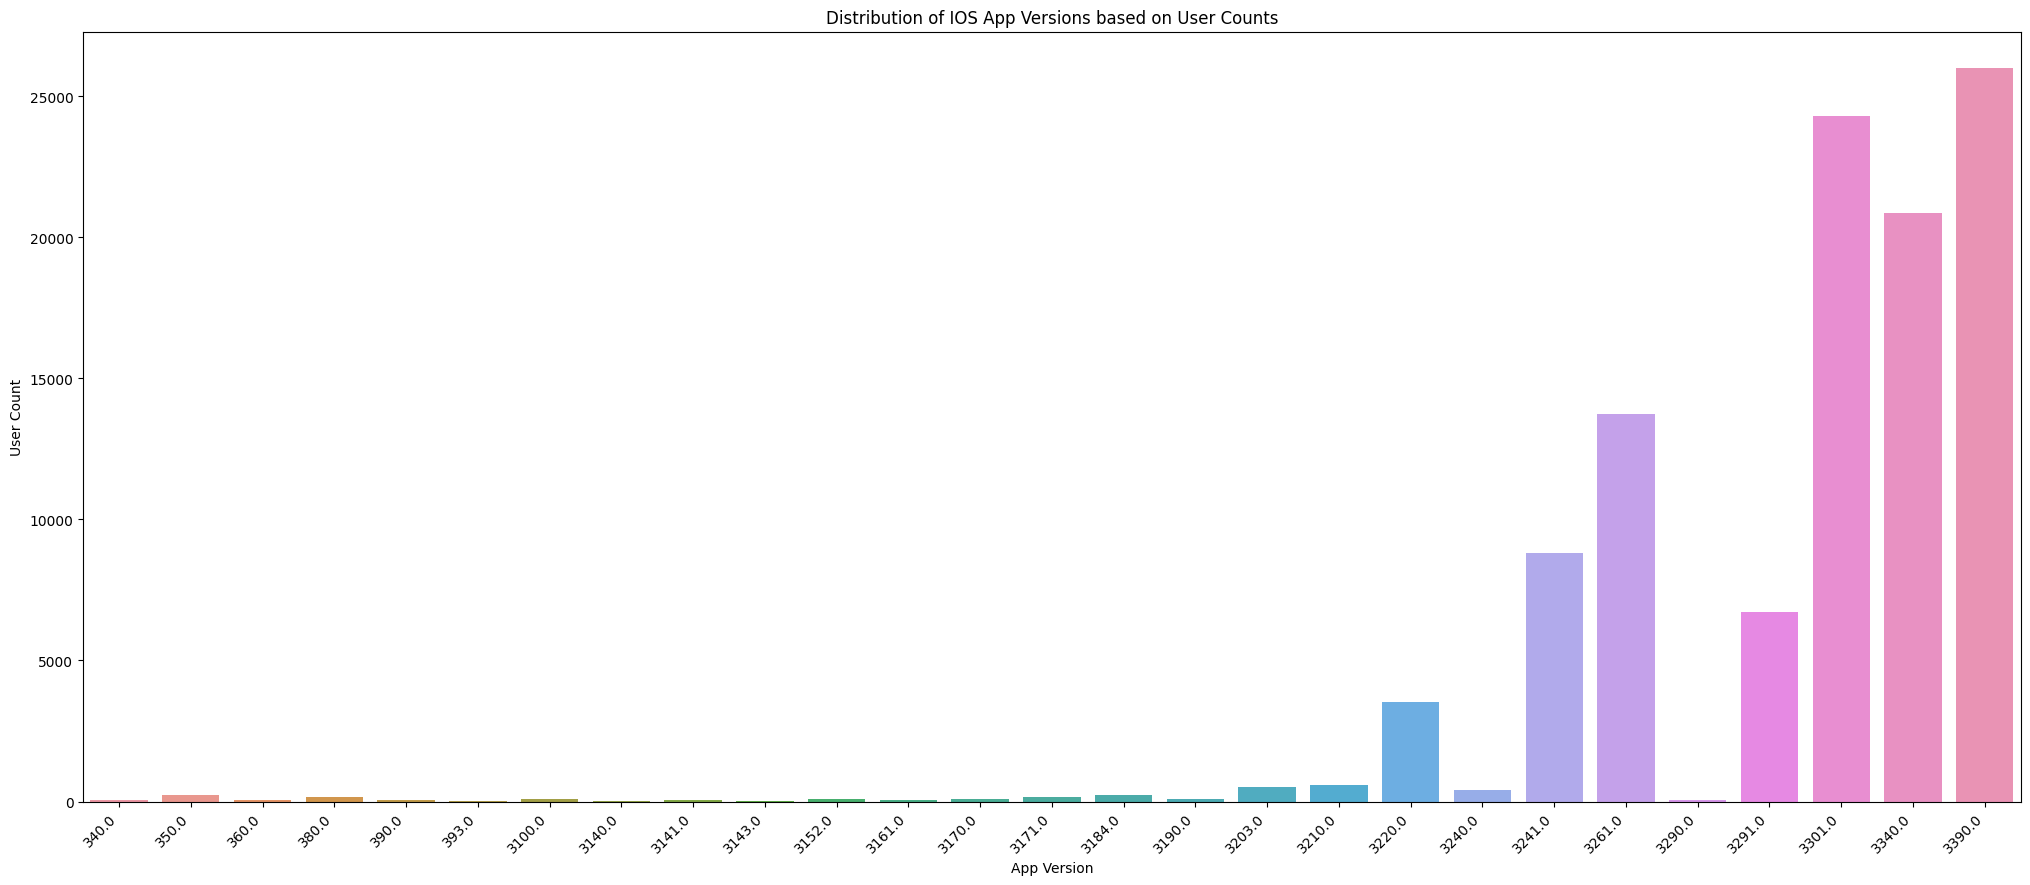

In [25]:
# Filter data for Android only
android_df = df[df['user_device_os'] == 'ios']

# Group by app version and calculate user counts
version_category = android_df.groupby('user_device_app_version').size().reset_index(name='user_count')

# Plot the bar graph
plt.figure(figsize=(25, 10))
sns.barplot(x='user_device_app_version', y='user_count', data=version_category.sort_values('user_count', ascending=False))
plt.title('Distribution of IOS App Versions based on User Counts')
plt.xlabel('App Version')
plt.ylabel('User Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [26]:
# Group by app version and OS and calculate the count of users
version_category = df.groupby(['user_device_app_version', 'user_device_os']).size().reset_index().rename(columns={0: 'user count'})

# Display the entire DataFrame (remove the display limit)
pd.set_option('display.max_rows', None)

# Filter the DataFrame for Android and iOS separately
android_data = version_category[version_category['user_device_os'] == 'android']
ios_data = version_category[version_category['user_device_os'] == 'ios']

# Display the Android and iOS data separately
print("Android User Counts:")
android_data


Android User Counts:


,user_device_app_version,user_device_os,user count
0,40.0,android,4
1,46.0,android,27
2,49.0,android,76
3,50.0,android,87
4,51.0,android,79
5,54.0,android,7
6,55.0,android,46
7,56.0,android,27
8,57.0,android,97
9,58.0,android,520


In [27]:
print("\niOS User Counts:")
ios_data


iOS User Counts:


,user_device_app_version,user_device_os,user count
74,340.0,ios,49
75,350.0,ios,243
76,360.0,ios,67
77,380.0,ios,144
78,390.0,ios,52
79,393.0,ios,28
80,3100.0,ios,74
81,3140.0,ios,23
82,3141.0,ios,50
83,3143.0,ios,31


**Android User Counts:**

* The distribution of Android app versions varies widely, with some versions having significantly higher user counts than others.

* Android app versions like 276.0, 277.0, 278.0, 279.0, 280.0, and 286.0 have very high user counts, suggesting that a large portion of users are using these versions.

* Some versions, such as 284.0 and 285.0, also have substantial user counts but are relatively lower compared to the versions mentioned above.
The user counts decrease for versions outside the more recent ones, but even older versions still have some users.

**iOS User Counts:**

* Similar to Android, there is a wide distribution of user counts across iOS app versions.

* Versions like 3241.0, 3340.0, 3390.0, 3220.0, 3261.0, and 3301.0 have notable user counts, indicating popularity among iOS users.

* The user counts for iOS versions appear to be more evenly distributed compared to Android, with multiple versions having substantial user bases.

* There is a substantial drop in user counts for versions older than 3241.0, suggesting that a significant portion of iOS users is using more recent versions.

#**Step 5: Feature Engineering with Automated Tools**

**feature-engine** is an open-source Python library for feature engineering. It provides a variety of transformers to handle missing data, encode categorical variables, discretize numerical variables, and more.

## **Installing FeatureTools**

In [34]:
!pip install -U feature-engine


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 6.0 MB/s eta 0:00:00


## **Importing Libraries**


In [52]:
import pandas as pd
from feature_engine.imputation import MeanMedianImputer
from feature_engine.encoding import OneHotEncoder
from feature_engine.transformation import LogTransformer

## **Performing feature-engine**

In [56]:
# Assuming df is your cleaned DataFrame
df_engineered = df.copy()

# Impute missing values in 'median_pickup_walk_time' with the median
median_imputer = MeanMedianImputer(imputation_method='median', variables=['median_pickup_walk_time'])
df_engineered = median_imputer.fit_transform(df_engineered)

# One-hot encode 'user_device_os'
one_hot_encoder = OneHotEncoder(top_categories=None, variables=['user_device_os'])
df_engineered = one_hot_encoder.fit_transform(df_engineered)

# Add a constant (e.g., 1) before applying the log transformation
constant = 1
df_engineered['num_of_results'] = np.log1p(df_engineered['num_of_results'] + constant)

## **Display the updated DataFrame with engineered features**

In [58]:
df_engineered.head()

,session_id,search_id,user_id,search_time,num_of_results,is_result,median_pickup_walk_time,median_dropoff_walk_time,median_bus_travel_time,high_demand_val,user_device_app_version,user_device_os_ios,user_device_os_android
0,9f0837bf-b77c-41dd-a860-25f62f0c1a6e,1beb144b-8579-464d-8a4b-10577bc9c141,5ac5df04ec46ee0010a8cec3,2020-03-16 06:49:58.814 UTC,2.484907,True,480.0,2220.0,2334.0,0,3390.0,1,0
1,6a4ad376-379b-4b1c-8292-8993e955471b,66ec3aea-89da-4fa4-b9c9-39e9726fdbdf,5be6e1dca53db40018ac0165,2020-03-22 13:01:57.292 UTC,2.484907,True,6840.0,1320.0,5053.0,0,292.0,0,1
2,1c105134-2927-4f81-981f-599945ce0320,42957ae9-9b23-443c-bb25-61209e701ef8,5c0402f999fa270019646155,2019-12-12 13:36:23.331 UTC,3.367296,True,900.0,1200.0,1354.5,0,286.0,0,1
3,b51ed2cb-ef7d-4d59-a3a1-0abbec416b70,105c5f07-5bfa-46ce-8128-05664439a365,5be5ef1d9f9ac40019655064,2019-10-27 13:01:10.589 UTC,3.737670,True,660.0,1320.0,3168.5,0,278.0,0,1
4,b662abc9-e7df-4efe-9d22-66a600816ab7,e106993c-3487-496a-9a6f-0ea4210fe408,5df48e0015f009001aca7c8c,2019-12-15 07:16:43.328 UTC,3.737670,True,5880.0,1260.0,2615.0,0,3301.0,1,0


In [59]:
# Summary Statistics
summary_statistics = df.describe()

# Conversion Rate Analysis
conversion_rate = df['is_result'].mean()

# Time-based Analysis
df['search_time'] = pd.to_datetime(df['search_time'])
df['hour'] = df['search_time'].dt.hour
searches_by_hour = df.groupby('hour')['search_id'].count()

# Correlation Analysis
correlation_matrix = df.corr()

# User Segmentation Analysis
user_segmentation = df.groupby(['user_device_app_version', 'user_device_os'])['search_id'].count()

# Display Results
print("Summary Statistics:")
print(summary_statistics)

print("\nConversion Rate:")
print(f"Conversion Rate: {conversion_rate:.2%}")

print("\nSearches by Hour:")
print(searches_by_hour)

print("\nCorrelation Matrix:")
print(correlation_matrix)

print("\nUser Segmentation:")
print(user_segmentation)

Summary Statistics:
       num_of_results  median_pickup_walk_time  median_dropoff_walk_time  \
count   569933.000000            569933.000000             569933.000000   
mean        14.879624              1124.581872                828.282096   
std         14.739746              2298.489094               2018.066558   
min          0.000000                 0.000000                  0.000000   
25%          7.000000                 0.000000                 60.000000   
50%         10.000000               420.000000                360.000000   
75%         25.000000               960.000000                840.000000   
max        100.000000             81600.000000              84960.000000   

       median_bus_travel_time  high_demand_val  user_device_app_version  
count           569933.000000    569933.000000            569933.000000  
mean              2511.443553         0.674246               846.886624  
std               2106.647896         1.664509              1182.957888  

# **Step 6: Feature Selection**
Feature selection is a crucial step in optimizing machine learning models. It involves choosing a subset of relevant features from the original set to improve model performance, reduce overfitting, and enhance interpretability.

## **Feature Importance**
Feature importance is a technique for assigning scores to input features to a predictive model that indicates the relative importance of each feature when making a prediction

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Assuming 'num_of_results' is a feature and 'is_result' is the target variable
X = df[['num_of_results', 'median_pickup_walk_time', 'median_dropoff_walk_time', 'median_bus_travel_time', 'high_demand_val', 'user_device_os', 'user_device_app_version']]
y = df['is_result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # You can use a different imputation strategy
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # You can use a different imputation strategy
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
    ])

# Create the final pipeline with preprocessing and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', RandomForestClassifier())])

# Fit the model to the training data
pipeline.fit(X_train, y_train)

# Get feature importances
feature_importances = pipeline.named_steps['classifier'].feature_importances_

In [64]:
feature_importances

array([3.16886024e-01, 9.69308392e-02, 2.16945716e-01, 3.54136473e-01,
       1.27105291e-02, 1.55127059e-03, 3.13545441e-04, 5.25603443e-04])

In [81]:
# Convert feature importances to percentages
feature_importances_percentage = feature_importances * 100

# Get feature names after one-hot encoding
categorical_encoder = pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
feature_names = numerical_features.tolist() + categorical_encoder.get_feature_names_out(categorical_features).tolist()

# Get the indices of the top 8 feature importances
top_indices = np.argsort(feature_importances)[-8:]
top_indices

array([6, 7, 5, 4, 1, 2, 0, 3])

In [82]:
# Convert feature importances to percentages
feature_importances_percentage = feature_importances * 100

# Get feature names after one-hot encoding
categorical_encoder = pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
feature_names = numerical_features.tolist() + categorical_encoder.get_feature_names_out(categorical_features).tolist()

# Create a DataFrame with feature names and their importance percentages
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance (%)': feature_importances_percentage})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance (%)', ascending=False)

# Display the table
print(feature_importance_df)

                    Feature  Importance (%)
3    median_bus_travel_time       35.413647
0            num_of_results       31.688602
2  median_dropoff_walk_time       21.694572
1   median_pickup_walk_time        9.693084
4           high_demand_val        1.271053
5   user_device_app_version        0.155127
7        user_device_os_ios        0.052560
6    user_device_os_android        0.031355


# **Step 7 : Visualization**
To visualize the feature importances obtained from the Random Forest model in your pipeline, we use a bar plot.

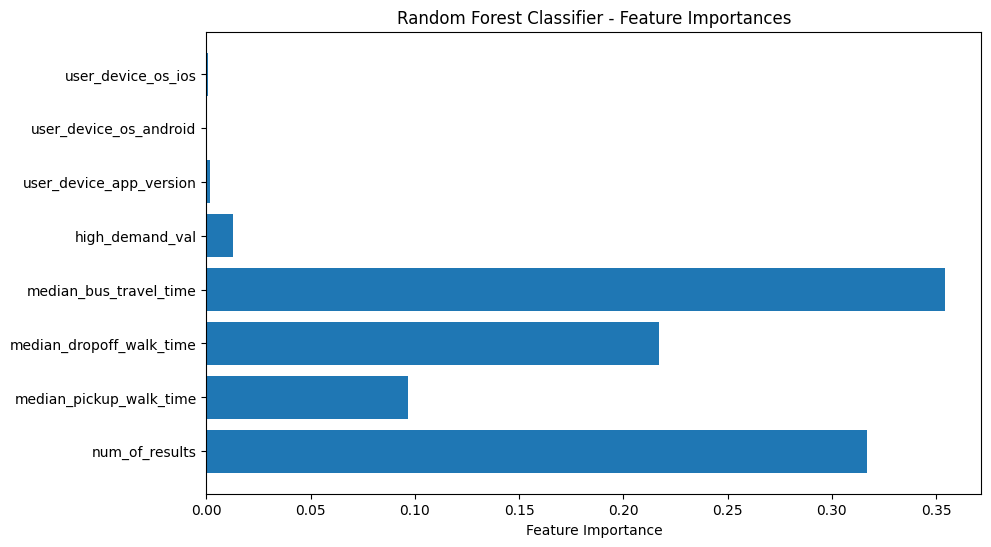

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature names after one-hot encoding
categorical_encoder = pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
feature_names = numerical_features.tolist() + categorical_encoder.get_feature_names_out(categorical_features).tolist()

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(np.arange(len(feature_importances)), feature_names)
plt.xlabel('Feature Importance')
plt.title('Random Forest Classifier - Feature Importances')
plt.show()


## **Conversion Rate Analysis**

In [67]:
conversion_rate = df['is_result'].mean()
conversion_rate

0.7835096406068783

## **Time-based Analysis**

In [71]:
# Time-based Analysis
df['search_time'] = pd.to_datetime(df['search_time'])
df['hour'] = df['search_time'].dt.hour
searches_by_hour = df.groupby('hour')['search_id'].count()
searches_by_hour


hour
0     17562
1     10349
2      6293
3      3712
4      2587
5      3638
6      9747
7     17648
8     18852
9     20098
10    22543
11    26212
12    30037
13    35085
14    37797
15    39552
16    38853
17    39427
18    37443
19    36454
20    33115
21    30896
22    28576
23    23457
Name: search_id, dtype: int64

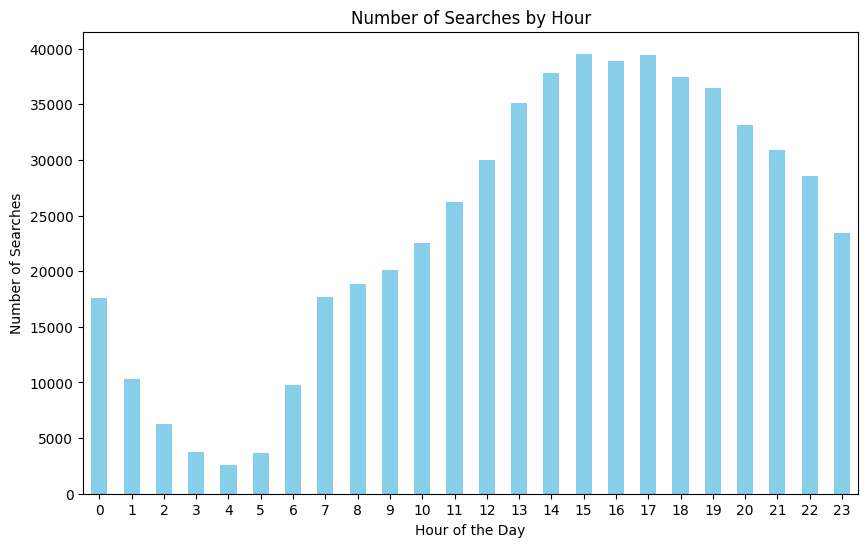

In [72]:

plt.figure(figsize=(10, 6))
searches_by_hour.plot(kind='bar', color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Searches')
plt.title('Number of Searches by Hour')
plt.xticks(rotation=0)
plt.show()

## **Correlation Analysis**

In [74]:
# Correlation Analysis
correlation_matrix = df.corr()
correlation_matrix

,num_of_results,is_result,median_pickup_walk_time,median_dropoff_walk_time,median_bus_travel_time,high_demand_val,user_device_app_version,hour
num_of_results,1.000000,0.530639,0.121839,0.099683,0.299079,0.244808,0.000443,-0.017433
is_result,0.530639,1.000000,0.257185,0.215745,0.626656,0.212927,0.123519,-0.077117
median_pickup_walk_time,0.121839,0.257185,1.000000,0.130196,0.248251,0.044319,0.066451,-0.052235
median_dropoff_walk_time,0.099683,0.215745,0.130196,1.000000,0.301060,0.094468,0.058675,-0.022035
median_bus_travel_time,0.299079,0.626656,0.248251,0.301060,1.000000,0.156070,0.080792,-0.049768
high_demand_val,0.244808,0.212927,0.044319,0.094468,0.156070,1.000000,0.006602,-0.096337
user_device_app_version,0.000443,0.123519,0.066451,0.058675,0.080792,0.006602,1.000000,-0.012890
hour,-0.017433,-0.077117,-0.052235,-0.022035,-0.049768,-0.096337,-0.012890,1.000000


## **User Segmentation Analysis**

In [75]:
# User Segmentation Analysis
user_segmentation = df.groupby(['user_device_app_version', 'user_device_os'])['search_id'].count()
user_segmentation

user_device_app_version  user_device_os
40.0                     android                4
46.0                     android               27
49.0                     android               76
50.0                     android               87
51.0                     android               79
54.0                     android                7
55.0                     android               46
56.0                     android               27
57.0                     android               97
58.0                     android              520
59.0                     android                6
61.0                     android               22
62.0                     android              301
64.0                     android               87
65.0                     android              746
66.0                     android                5
67.0                     android               14
68.0                     android               60
69.0                     android              136
70.0      

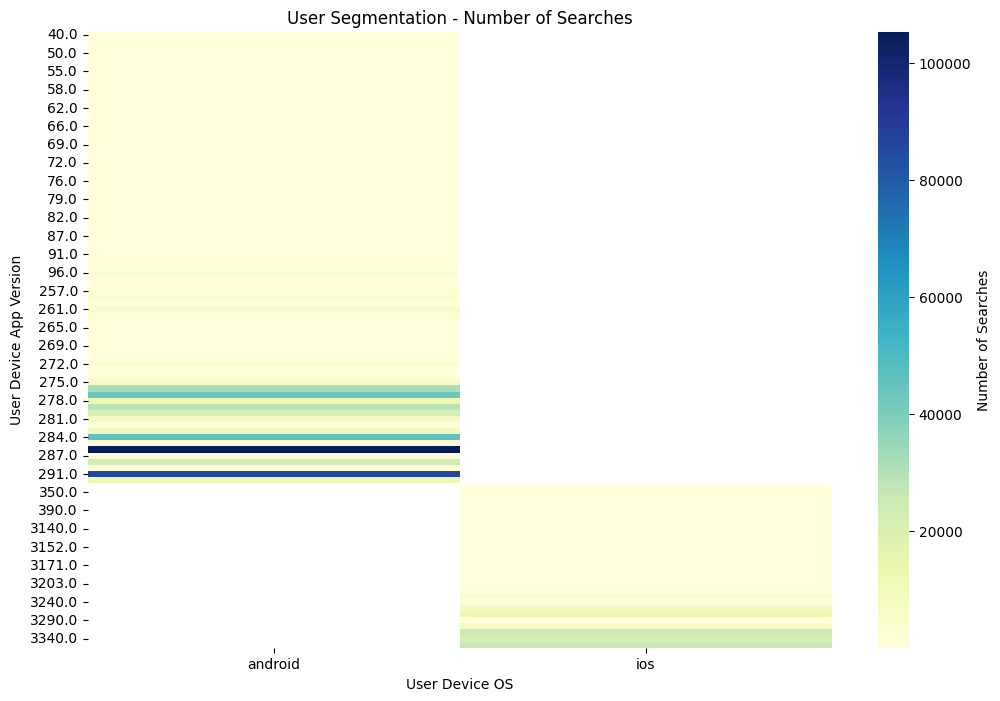

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape the data for the heatmap
heatmap_data = user_segmentation.unstack()

# Plot the heatmap without count annotations
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", cbar_kws={'label': 'Number of Searches'})
plt.xlabel('User Device OS')
plt.ylabel('User Device App Version')
plt.title('User Segmentation - Number of Searches')
plt.show()

## **Summary Statistics**

In [66]:
# Summary Statistics
summary_statistics = df.describe()
summary_statistics

,num_of_results,median_pickup_walk_time,median_dropoff_walk_time,median_bus_travel_time,high_demand_val,user_device_app_version,hour
count,569933.000000,569933.000000,569933.000000,569933.000000,569933.000000,569933.000000,569933.000000
mean,14.879624,1124.581872,828.282096,2511.443553,0.674246,846.886624,14.329544
std,14.739746,2298.489094,2018.066558,2106.647896,1.664509,1182.957888,5.766951
min,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000
25%,7.000000,0.000000,60.000000,797.500000,0.000000,279.000000,11.000000
50%,10.000000,420.000000,360.000000,2506.000000,0.000000,286.000000,15.000000
75%,25.000000,960.000000,840.000000,3645.000000,0.000000,291.000000,19.000000
max,100.000000,81600.000000,84960.000000,27024.000000,10.000000,3390.000000,23.000000


# **Step 8 : Summary**

## **Summary based on feature importances:**

These percentages reflect the relative importance of each feature in predicting the target variable, with higher percentages indicating greater importance.
1. **median_bus_travel_time (35.41%)**: This feature has the highest importance, indicating that it plays a crucial role in predicting the target variable.

2. **num_of_results (31.69%)**: The number of results returned for the search is another highly important feature.

3. **median_dropoff_walk_time (21.69%)**: The estimated time taken by the user to walk from the bus station to the desired destination also contributes significantly to the model.

4. **median_pickup_walk_time (9.69%)**: This feature represents the estimated time taken by the user to walk from their desired pickup location to the bus station.

5. **high_demand_val (1.27%)**: Indicates whether there is high demand, and it has a lower but non-negligible importance.

6. **user_device_app_version (0.16%)**: The version of the mobile app used by the user also has a minor impact.

7. **user_device_os_ios (0.05%) and user_device_os_android (0.03%)**: These one-hot encoded features represent the user's mobile device operating system (iOS or Android) and contribute minimally to the model.


## **Summary Statistics:**

**Number of Results:**
- The mean number of results returned for a search is approximately 14.88.
- The minimum and maximum values are 0 and 100, respectively.
- The distribution has a median of 10, indicating a slightly right-skewed distribution.

**Walk Times:**
- The median pickup walk time has a mean of 1124.58, with a wide range from 0 to 81600.
- The median dropoff walk time has a mean of 828.28, ranging from 0 to 84960.
- The median bus travel time has a mean of 2511.44, ranging from 0 to 27024.

**High Demand:**
- The high_demand_val column has a mean of approximately 0.67.
- The maximum value is 10, suggesting that some searches have very few seats left or the bus is full.

**User Device App Version:**
- The mean user device app version is around 846.89, with a wide range up to 3390.
- The standard deviation for this feature is relatively high (1182.96), indicating substantial variability.

**Conversion Rate:**
- The conversion rate is calculated as 78.35%, indicating that searches result in a positive outcome (is_result = 1) in about 78.35% of cases.

**Searches by Hour:**
- The number of searches varies by hour, with the highest number observed at hour 15.

**Correlation Matrix:**
- Strong positive correlations are observed between num_of_results and is_result, is_result and median_bus_travel_time, and num_of_results and median_bus_travel_time.
- Negative correlations are observed between hour and is_result and high_demand_val.

**User Segmentation Analysis:**
- The majority of users are on Android devices, with versions ranging widely.
iOS users also contribute to the searches, with app versions showing significant variability.
- Users on Android versions 286.0 have the highest search count, followed by version 291.0.
For iOS, version 3340.0 and 3390.0 have substantial search counts.
- Consider optimizing the user experience for Android users, especially those on version 286.0 and 291.0, as they represent a significant portion of your user base.
For iOS users, focus on versions 3340.0 and 3390.0 to enhance the app experience and potentially attract more users from these versions.
